


# <font color='red'><b> Climate Sensitivity and Climate Feedbacks</b></font>
<br><b> SIO 173 - Dynamics of the Atmosphere and Climate </b><br>
Scripps Institution of Oceanography, UC San Diego<br>
*May 28, 2024 <br>
Philipp Arndt, parndt@ucsd.edu*<br><br>



---
<br>

# Climate Sensitivity

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/climate_sensitivity_schematic.jpg?raw=true" alt="banner" width="40%">

General idea:
> *How does the Earth's surface temperature $T_s$ change in response to a radiative forcing $\Delta Q$ at the top of the atmosphere? $\Rightarrow \lambda_R = \frac{\Delta T_s}{\Delta Q}$*

Often asked more specifically:
> *By how much does the Earth's temperature increase when the amount of $\mathrm{CO}_2$ in the atmosphere doubles? (We denote this value by $\Delta T_{2\times\mathrm{CO}_2}$.)*

<br>

# Climate Feedbacks

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/climate_feedbacks_schematic.jpg?raw=true" alt="banner" width="40%">

Climate feedbacks are processes in the climate system which respond to surface temperature changes in a way that amplifies or dampens the effect of an external forcing that initially caused the warming.

<br>

---

In essence:<br>
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/climate_sensitivity_intro_diagram.png?raw=true" alt="banner" width="25%">

(...and some notes from the board below)

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/SIO173_Climate%20Sensitivity_and_Feedbacks.jpg?raw=true" alt="banner" width="100%">

---

## <font color='red'><b> Review of the Global Energy Balance </b>

## <font color='red'><b> No atmosphere: </b>


<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/radiative_balance_earth_no_atmosphere.png?raw=true" alt="banner" width="60%">

where
- $S = \frac{L}{4\pi r_E^2} \approx 1360 \mathrm{\,W\,m}^{-2}$ is the solar constant,
- $\sigma = 5.67 \times 10^{-8}\mathrm{\,W\,m}^{-2}\mathrm{\,K}^{-4}$ is the Stefan-Boltzmann constant,
- $\alpha \approx 0.3$ is the Earth's albedo
- $T_s$ is the surface temperature

If we assume that Earth is in radiative balance ($Q_\text{in} = Q_\text{out}$), we have (see class notes)

\begin{align}
  T_e = \left(\frac{S (1 - \alpha)}{4\sigma} \right)^{1/4} \approx -19 ^\circ\mathrm{C} \approx -2 ^\circ\mathrm{F}.
\end{align}

This is too cold to be the actual surface temperature!

In [1]:
# imports
from IPython.display import display, Markdown, HTML
import numpy as np

# specify constants
S = 1360.  # Solar constant, W / m^2
sigma = 5.67e-8  # Stefan-Boltzmann constant W / (m^2 K^4)

# temperature conversions (for printing results in familiar units)
def k2f(k):
    return (k - 273.15) * 9/5 + 32
def k2c(k):
    return (k - 273.15)

# function to calculate the effective/emission temperature
def get_Te(alpha=0.3, S=S, sigma=sigma, verbose=False):
  T = (S * (1 - alpha) / (4 * sigma)) ** (1 / 4)
  if verbose:
    display(Markdown(r'**The surface temperature is $%.0f ^\circ\mathrm{C}$ / $%.0f \mathrm{\,K}$ / $%.0f ^\circ\mathrm{F}$.**' % (k2c(T), T, k2f(T))))
  return T

# calculate the result for the effective temperature (also the surface temperature in this case)
T_e = get_Te(verbose=True);

**The surface temperature is $-19 ^\circ\mathrm{C}$ / $255 \mathrm{\,K}$ / $-2 ^\circ\mathrm{F}$.**

---
## <font color='red'><b> A simple greenhouse model: </b>

Add an atmosphere into the model that absorbs all outgoing longwave radiation and emits in all directions.

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/radiative_balance_earth_opaque_atmosphere.png?raw=true" alt="banner" width="35%">

Here we find (Marshall & Plumb, 2.3.1) that
\begin{align}
    T_s = 2^{1/4} T_e \approx 30^\circ\mathrm{C} \approx 85^\circ\mathrm{F}.
\end{align}

Now, this is too hot!



In [2]:
# calculate the surface temperature for this model
T_s = 2**(1/4) * T_e

# print the result
display(Markdown(r'**The surface temperature is $%.0f ^\circ\mathrm{C}$ / $%.0f \mathrm{\,K}$ / $%.0f ^\circ\mathrm{F}$.**' % (k2c(T_s), T_s, k2f(T_s))))

**The surface temperature is $30 ^\circ\mathrm{C}$ / $303 \mathrm{\,K}$ / $85 ^\circ\mathrm{F}$.**

---
## <font color='red'><b> A "leaky" greenhouse: </b>

Now, the atmosphere only absorbs a fraction $\varepsilon$ of the outgoing longwave radiation. We call $\varepsilon$ the **absorptivity** of the atmosphere.

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/radiative_balance_earth_leaky_greenhouse.png?raw=true" alt="banner" width="35%">


In this case we find (Marshall & Plumb, chapter 2.3.2) that
\begin{align}
    T_s = \left( \frac{2}{2-\varepsilon} \right)^{1/4} T_e.
\end{align}

To tune this to the average surface temperature that we see on Earth, we can set $T_s^\text{(earth)} = 288 \mathrm{\,K}$ and solve for
\begin{align}
    \varepsilon_0 = 2 \left(1-\left(\frac{T_e}{T_s^\text{(earth)}}\right)^4\right) \approx 0.78.
\end{align}

In [3]:
# specify the current surface temperature of the earth
T_s_earth = 288

# calculate the epsilon that is needed to achieve this temperature, using the formula above
epsilon_tuned = 2 - 2 * (T_e / T_s_earth)**4

# define a function to calculate T_s in this model
def get_Ts_from_Te(T_e, epsilon=epsilon_tuned):
    return (2 / (2 - epsilon)) ** (1 / 4) * T_e

# calculate the results and print them to check that this works out
T_s = get_Ts_from_Te(T_e = get_Te(alpha=0.3), epsilon=epsilon_tuned)
display(Markdown(r'**If we let $\varepsilon=\varepsilon_0\approx%.5g$, the surface temperature is $%.1f ^\circ\mathrm{C}$ / $%.1f \mathrm{\,K}$ / $%.1f ^\circ\mathrm{F}$.**' % (epsilon_tuned, k2c(T_s), T_s, k2f(T_s))))

**If we let $\varepsilon=\varepsilon_0\approx0.77974$, the surface temperature is $14.9 ^\circ\mathrm{C}$ / $288.0 \mathrm{\,K}$ / $58.7 ^\circ\mathrm{F}$.**

Now, if we increase $\varepsilon$, we "trap" more radiation inside the atmosphere. This means the surface temperature will increase.

---

### Relationship between absorptivity and $\mathrm{CO}_2$ in the atmosphere.

The additional amount of outgoing longwave radiation that is trapped inside the atmosphere if we increase $\varepsilon$ from $\varepsilon_0$ to $\varepsilon_1$ is given by
\begin{align}
    \Delta Q = \sigma \left(T_s^\text{earth}\right)^4 \frac{\varepsilon_{2\times\mathrm{CO}_2} - \varepsilon_0}{2}.
\end{align}

This is the change to the total radiative flux at the top of the atmosphere, which we refer to as "radiative forcing". To relate our atmospheric absorptivity parameter $\varepsilon$ to a doubling in $\mathrm{CO}_2$ we use the fact that the corresponding radiative forcing is
\begin{align}
    \Delta Q_{2\times\mathrm{CO}_2} \approx 3.7 \text{ to } 4 \mathrm{\,W\,m}^{-2}.
\end{align}
Using this, we can calculate the change in atmospheric absorptivity that we need in our model to obtain a radiative forcing equal to $\Delta Q_{2\times\mathrm{CO}_2}$:
\begin{align}
    \Delta \varepsilon_{2\times\mathrm{CO}_2} =  \varepsilon_{2\times\mathrm{CO}_2} - \varepsilon_0 =
    \frac{2 \Delta Q_{2\times\mathrm{CO}_2}}{\sigma \left(T_s^\text{earth}\right)^4} \approx 0.02.
\end{align}

In [4]:
# calculate the increase in epsilon that is needed for a doubling in CO2
deltaR_2xCO2 = 3.9  # pick a value in the given range
delta_epsilon_2xCO2 = 2 * deltaR_2xCO2 / (sigma * T_s_earth**4)
epsilon_new = epsilon_tuned + delta_epsilon_2xCO2

# print the results
display(Markdown(r'**$\Delta\varepsilon_{2\times\mathrm{CO}_2}\approx%.4g$, which gives an atmospheric absorptivity of $\varepsilon_{2\times\mathrm{CO}_2}\approx%.3g$ after doubling $\mathrm{CO}_2$.**' % (delta_epsilon_2xCO2, epsilon_new)))

**$\Delta\varepsilon_{2\times\mathrm{CO}_2}\approx0.02$, which gives an atmospheric absorptivity of $\varepsilon_{2\times\mathrm{CO}_2}\approx0.8$ after doubling $\mathrm{CO}_2$.**

### Now calculate the equilibrium climate sensitivity: Change in temperature from a doubling in atmospheric $\mathrm{CO}_2$:

In [5]:
# calculate the temperature after doubling CO2, based on the result for epsilon and using the functions above
T_s_new = get_Ts_from_Te(T_e = get_Te(alpha=0.3), epsilon=epsilon_new)

# print the results
display(Markdown(r'**If we increase absorptivity to $\varepsilon=%.3g$, the surface temperature is $%.1f ^\circ\mathrm{C}$ / $%.1f \mathrm{\,K}$ / $%.1f ^\circ\mathrm{F}$.**' % (epsilon_new, k2c(T_s_new), T_s_new, k2f(T_s_new))))
display(Markdown(r'**$\rightarrow$ The increase in absorptivity $\varepsilon$ results in a temperature increase of $\Delta T_{2\times\mathrm{CO}_2} = %.1f^\circ\mathrm{C}$.**' % (T_s_new - T_s)))

**If we increase absorptivity to $\varepsilon=0.8$, the surface temperature is $16.0 ^\circ\mathrm{C}$ / $289.2 \mathrm{\,K}$ / $60.9 ^\circ\mathrm{F}$.**

**$\rightarrow$ The increase in absorptivity $\varepsilon$ results in a temperature increase of $\Delta T_{2\times\mathrm{CO}_2} = 1.2^\circ\mathrm{C}$.**

---
### What have we done so far?
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/loops_reference.png?raw=true" alt="banner" width="30%">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/initial-warming.jpg?raw=true" alt="banner" width="30%">


---
## <font color='red'><b> What happens if albedo is dependent on temperature?<br>(the ice-albedo feedback)</b>

When the surface temperture increases due to an increased absorptivity (i.e. more $\mathrm{CO}_2$ in the atmosphere), we expect more ice and snow to melt. This, in turn will mean that less sunlight is reflected away from the earth $\Rightarrow$ the albedo of earth will decrease. The increased surface absorption of radiation means that temperature increases even. This causes more snow and ice to melt, and so on...

Since the temperature change due to an initial forcing creates an additional forcing, we call this a **"feedback loop"**:

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks-icealbedo.png?raw=true" alt="banner" width="25%">

<br>

---

<br>

Let's define this temperature-dependent albedo as:

\begin{align}
\alpha(T) = \left\{ \begin{array}{ccc}
\alpha_i & \mathrm{if}  & T \le T_i \\
\alpha_o + (\alpha_i-\alpha_o) \frac{(T-T_o)^2}{(T_i-T_o)^2} &  \mathrm{if} & T_i < T < T_o \\
\alpha_o &  & \mathrm{otherwise.}  \end{array} \right\}
\end{align}

where

- $\alpha_o = 0.25$ is the albedo of a warm, ice-free planet
- $\alpha_i = 0.95$ is the albedo of a very cold planet, completely covered in snow and ice
- $T_o = 295 \mathrm{\,K}$ is the threshold temperature above which we assume the planet is ice-free
- $T_i \approx 268.8 \mathrm{\,K}$ is the threshold temperature below which we assume the planet is completely ice covered.

*Note: these albedo values are totally not accurate and were chosen for illustration purposes only!*

<br>

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/earth_temperature_albedo.jpg?raw=true" alt="banner" width="50%">

Note that the "snowball" is much more reflective (bright!) than the ice-free earth.



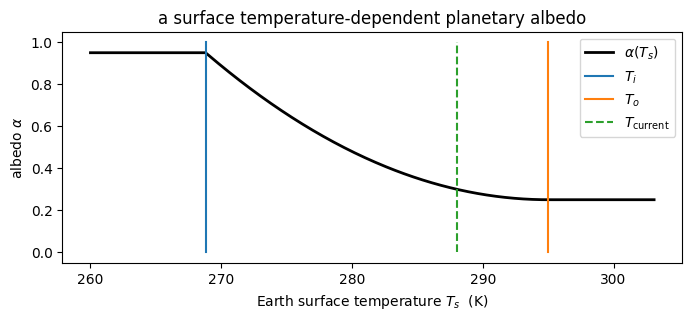

In [6]:
# define the temperature-dependent albedo
# (this is code for the mathematical expression above)
def albedo(T, alpha_o=0.25, alpha_i=0.95, To=295., Ti=268.8083981781207):
    try:
        T = np.array(T)
        alb = alpha_o + (alpha_i-alpha_o)*(T-To)**2 / (Ti - To)**2
        alb[T<Ti] = alpha_i
        alb[T>To] = alpha_o
        return alb
    except:
        alb = alpha_i if T<Ti else alpha_o + (alpha_i-alpha_o)*(T-To)**2 / (Ti - To)**2
        if T>To: alb = alpha_o
    return alb

# plot the resulting albedo for a range of temperatures
import matplotlib.pyplot as plt
T_array = np.arange(260, 303.1, 0.1)
fig, ax = plt.subplots(figsize=[8,3])
ax.plot(T_array, albedo(T_array), 'k-', lw=2, label=r"$\alpha(T_s)$")
ax.plot([268.8083981781207]*2, [0,1], color='C0', label=r"$T_i$")
ax.plot([295]*2, [0,1], color='C1', label=r"$T_o$")
ax.plot([288]*2, [0,1], color='C2', ls='--', label=r"$T_\mathrm{current}$")
ax.set_title("a surface temperature-dependent planetary albedo")
ax.set_ylabel(r"albedo $\alpha$")
ax.set_xlabel(r"Earth surface temperature $T_s$  $(\mathrm{K})$")
ax.legend(loc="upper right");

<br>

---

<br>

In our model, $T_s$ is calculated using the albedo, but the albedo is itself dependent on $T_s$:
\begin{align}
    T_s &= \left( \frac{2}{2-\varepsilon} \right)^{1/4} T_e \\
    &= \left(\frac{2 S (1 - \alpha(T_s))}{(2-\varepsilon)4\sigma} \right)^{1/4}.
\end{align}
This means that we need to iteratively re-caclulate the surface temperature and albedo until the result converges.

In [7]:
# specify the physical constants
S = 1360.  # Solar constant, W / m^2
sigma = 5.67e-8  # Stefan-Boltzmann constant W / (m^2 K^4)

# a function to calculate the surface temperature of our model, as a function of albedo (alpha) and atmospheric absorptivity (epsilon)
# (this is the equation for T_s above)
def get_Ts(alpha=0.3, epsilon=epsilon_tuned, S=S, sigma=sigma):
    T_e = (S * (1 - alpha) / (4 * sigma)) ** (1 / 4)
    return (2 / (2 - epsilon)) ** (1 / 4) * T_e

# a function that iteratively solves for surface temperature and albedo in equilibrium
# this will run until the difference in T_s from one iteration to the next is smaller than tol=1e-5
# if it has not converged in max_iter=1000 iterations, it prints a warning
def solve_for_T(T0=288, epsilon=epsilon_tuned, tol=1e-5, max_iter=1000, return_albedo=False):
    T_old = T0
    i = 0
    diff = tol + 1
    while (diff > tol) & (i < max_iter):
        i += 1
        T_new = get_Ts(alpha=albedo(T_old), epsilon=epsilon)
        diff = np.abs(T_new - T_old)
        T_old = T_new
        if i == (max_iter):
            print("Warning: solve_for_T computation did not converge to desired tolerance.")
            print(diff)
    if return_albedo:
        return T_new, albedo(T_old)
    else:
        return T_new

---
<font color='red'> Increase absorptivity to $\varepsilon_{2\times\mathrm{CO}_2} \approx 0.8$ while albedo  $\alpha(T_s)$ changes based on surface temperature. <br><b>
How much does the surface temperature increase in equilibrium? </b>

In [8]:
# calculate temperatures for reference system
T0fix = get_Ts()
T1fix = get_Ts(epsilon=epsilon_new)
T0var = solve_for_T()

# calculate temperatures for the system that includes the ice-albedo feedback
T1var = solve_for_T(epsilon=epsilon_new)
dtfix = T1fix - T0fix
dtvar = T1var - T0var

# this prints the results as a (somewhat messy but readable) HTML table
html_content = '<!DOCTYPE html><html><head><script type="text/javascript" src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.7/MathJax.js?config=TeX-AMS-MML_HTMLorMML"></script></head><body><table border="1"><thead><tr>'
html_content += '<th colspan="2">&nbsp;</th><th colspan="2" style="background-color: #8eb9ff;">albedo</th>'
html_content += "</tr></thead><tbody>"
html_content += r'<tr><th colspan="2">&nbsp;</th><th style="background-color: #b8d3ff;">\(\alpha=0.3\) (fixed)</th><th style="background-color: #639fff;">\(\alpha(T_s)\) temperature-dependent</th></tr>'
html_content += r'<tr><th rowspan="2" style="background-color: #ffb2b2;">absorptivity</th><th style="background-color: #ffd9d9;">\(\varepsilon_0\) (current)</th><td style="background-color: #dcd6ec;">\(T_0 = %.1f\mathrm{\,K}\)</td><td style="background-color: #b1bcec;">\(T_0 = %.1f\mathrm{\,K}\)</td></tr>'
html_content += r'<tr><th style="background-color: #ff8a8a;">\(\varepsilon_{2\times\mathrm{CO}_2}\) (double \(\mathrm{CO}_2\))</th><td style="background-color: #dcafc5;">\(T_{2\times\mathrm{CO}_2} = %.1f\mathrm{\,K}\)</td><td style="background-color: #b195c5;">\(T_{2\times\mathrm{CO}_2} = %.1f\mathrm{\,K}\)</td></tr>'
html_content += r'<tr style="background-color: #F0E68C;"><th colspan="2">climate sensitivity \(\Delta T_{2\times\mathrm{CO}_2}\)</th><td>\(%.1f\mathrm{\,K}\)</td><td><font color="red"><b>\(%.1f\mathrm{\,K}\)</b></font></td></tr>'
html_content += r'</tbody></table><script type="text/javascript">MathJax.Hub.Queue(["Typeset", MathJax.Hub]);</script></body></html>'
html_content = html_content % (T0fix, T0var, T1fix, T1var, dtfix, dtvar)
display(HTML(html_content))

Based on our (simplified) energy balance model, we have calculated the *equilibrium climate sensitivity* for a doubling in $\mathrm{CO}_2$ for
- our reference system, and
- for a system that includes an ice-albedo feedback.

The ice-albedo feedback **reinforces the initial forcing**, and therefore acts to increase the climate sensitivity. <br>
This means that the ice-albedo feedback is a <font color='red'>positive / destabilizing</font> feedback. (More on that below...)

<br>

<table>
<tr>
<td><img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/loops_reference.png?raw=true" alt="banner" height="200px"></td>
<td><img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/loops_icealbedo_caption.png?raw=true" alt="banner" height="200px"></td>
</tr>
<tr>
<th><font size='4vw'><b>$\Delta T_{2\times\mathrm{CO}_2} \approx 1.2 \mathrm{\,K}$</th>
<th><font size='4vw'><b>$\Delta T_{2\times\mathrm{CO}_2} \approx 6.2 \mathrm{\,K}$</th>
</tr>
</table>

<font size='2pt'>
<br>Notes:<br>
- The actual value for $\Delta T_{2\times\mathrm{CO}_2}$ with a temperature-dependent albedo is not necessarily accurate, since the temperature-albdo relationship was chosen for illustrative (qualitative) purposes only!<br>
- The fact that the temperature $T_0 = 288 \mathrm{\,K}$ is the current surface temperature for $\varepsilon_0$, shows that in our model the Earth is equilibrium in its current state. This is because of how the model was set up. You can show that in the case of a temperature-dependent albedo, this equilibrium is actually *unstable*.
</font>

---
# <font color='red'><b> More feedbacks add up! </b>

There are many ways in which the climate system responds to a forcing. All the different feedbacks within the sytem add up to affect the total climate sensitivity. Individual feedbacks can be <font color='red'>positive / amplifying / destabilizing</font> or <font color='blue'>negative / dampening / stabilizing</font>.

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks-stabilizing-destabilizing.png?raw=true" alt="banner" width="50%">

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks_overview.jpg?raw=true" alt="banner" width="50%">



---

## <font color='red'><b> Water Vapor Feedback </b></font>

The water vapor feedback is based on the <b>Greenhouse effect</b>: Water vapor very efficiently absorbs outgoing longwave radiation and reemits infrared radiation in all directions. Similarly to an increase of $\mathrm{CO}_2$ in the atmosphere, this traps heat in the atmosphere and makes the Earth warmer. This is a <font color='red'>positive/destabilizing</font> feedback.

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/greenhouse-effect.png?raw=true" width=22%> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks-watervapor.png?raw=true" width=35%>


**Forcing:** Increased $\mathrm{CO}_2$ in the atmosphere (usually by humans)
- *CAUSE:* $\mathrm{CO}_2$ released into the atmosphere
- *MECHANISM:* more $\mathrm{CO}_2$ in the atmosphere enhances the greenhouse effect
- *EFFECT:* a warmer atmosphere

**Feedback:**  Increased water vapor in the atmosphere
- *CAUSE:* a warmer atmosphere can hold more water vapor (Clausius-Clapeyron relation from class $e_s \approx Ae^{BT}$!)
- *MECHANISM:* more water vapor in the atmosphere enhances the greenhouse effect
- *EFFECT:* an even warmer atmosphere




---

## <font color='red'><b> Lapse Rate Feedback </b></font>

- emission of infrared radiation varies with temperature
- longwave radiation escaping to space from the relatively cold upper atmosphere is less than that emitted toward the ground from the lower atmosphere
- global warming will likely result in a decrease of the lapse rate, and will therefore usually be a <font color='blue'>negative/stabilizing</font> feedback


<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/feedbacks-lapserate_negative.png?raw=true" width=30%>

*Caveat*: This does often not apply the polar regions, where there are strong temperature inversions. The feedback <font color='red'>can be positive in polar regions</font> and contribute to *polar amplification*. More on that in the next lecture...



---

## <font color='red'><b> Cloud Feedbacks </b></font>

Clouds can affect the radiative balance in multiple ways:
- they can reflect incoming sunlight (increase albedo) $\rightarrow$ cooling effect
- they can absorb/re-emit longwave radiation (enhanced greenhouse) $\rightarrow$ warming effect

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/clouds_positive.png?raw=true" width=18%> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/clouds_negative.png?raw=true" width=20%>

**Cloud thickness:**
Thick clouds have a greater effect on the albedo  

**Cloud height:**
Higher clouds have a greater effect on the outgoing radiation at the top of the atmosphere

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/clouds_high_low.jpg?raw=true" width=35%>


$\rightarrow$ high, thin clouds have a warming effect<br>
$\rightarrow$ low, thick clouds have a cooling effect

- How clouds change due to changes in the climate can lead to <font color='red'>positive</font> or <font color='blue'>negative</font> feedbacks
- The effect of cloud feedbacks is still *highly uncertain*


---

## <font color='red'><b> IPCC best estimates </b></font>

### Climate feedback estimates
<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/ipcc-feedbacks.png?raw=true" width=60%>

<br><br>

<img src="https://github.com/fliphilipp/images/blob/main/climate_sensitivity_feedbacks/ipcc-sensitivity.png?raw=true" width=60%>





---

# <font color='red'><b> Main Takeaways </b></font>
- How much the Earth's temperature changes in response to
forcing is known as the climate sensitivity.
-We can calculate the climate sensitivity for a reference
system as the change in surface temperature per change in
forcing
- Feedbacks respond to changes in temperature and alter the
total forcing
- A <font color='red'>positive</font>/<font color='blue'>negative</font> feedback <font color='red'>amplifies</font>/<font color='blue'>de-amplifies</font> the
forcing perturbation, <font color='red'>increasing</font>/<font color='blue'>decreasing</font> the Earth's
response
- The major feedbacks in the Earth's climate system are:
  - surface albedo feedback
  - water vapor feedback
  - lapse rate feedback
  - cloud feedbacks

<br><br><br><br>


<font size='2pt'>
Acknowledgements:
A lot of material in these lecture notes was adapted from [Emma Beer](https://profiles.rice.edu/faculty/emma-beer)'s notes on the same topic for SIO173 in Spring 2021. Some of the code was inspired by [The Climate Laboratory](https://brian-rose.github.io/ClimateLaboratoryBook/home.html) by [Brian E. J. Rose](https://www.atmos.albany.edu/facstaff/brose/index.html) at the University at Albany.
</font>

---

<br><br>

## <font color='blue'><b> Bonus Material from the Final Review Session </b></font>

**In the review session we formalized some of the math around climate sensitivity and climate feedbacks.**

Given the radiative flux $R = Q_\text{in} - Q_\text{out}$ at the top of the atmosphere, we have covered that climate sensitivity $\lambda_R$ asks the question: *How does surface temperature $T_s$ change with a change in $R$?* This means we can express it as
- $\lambda_R = \frac{\partial T_s}{\partial R}$ and
- $\lambda_R$ is in $\mathrm{K} / (\mathrm{W\, m}^{-2})$

The feedback parameter $\lambda_f$ for a feedback that's represented by the variable $f$ asks: *How does $R$ change with a change in $T_s$?* So we can write
- $\lambda_f = \frac{\partial (\Delta R_f)}{\partial T_s}$  where $\Delta R_f$ is the change of $R$ due to the feedback, which becomes $\lambda_f = \frac{\partial R}{\partial f}\Big\rvert_{\text{all variables but }f}  \frac{\partial f}{\partial T_s}$
- $\lambda_f$ is in $(\mathrm{W\, m}^{-2}) / \mathrm{K}$

### Calculating a feedback parameter in a simple system

If we have equations for how the radiative flux $R$ depends on the feedback variable $f$, and also an equation that describes how the feedback variable depends on surface temperature $T_s$, then estimating the feedback parameter simply amounts to taking the derivatives shown above.

Here, let's again consider the ice-albedo feedback, but with some simpler equations to make the math easier.

Consider the model
\begin{align}
    R = \frac{S}{4} (1-\alpha) - \sigma T_s^4
\end{align}
and assume thermal balance ($R=0$), which gives
\begin{align}
  T_s = T_e &= \left(\frac{S \times (1 - \alpha)}{4\sigma} \right)^{1/4}.
\end{align}

Now let's use a (very simplified) equation for the albedo feedback, which describes the fact that the planetary albedo decrease with surface temperature:
\begin{align}
    \alpha(T_s) = \alpha_0 - \frac{T_s - T_0}{T_\text{range}},
\end{align}
where
- $\alpha_0 = 0.3$,
- $T_0 = 288 \mathrm{\,K}$, and
- $T_\text{range} = 30 \mathrm{\,K}$.

First, make a plot of how the albedo depends on temperature:

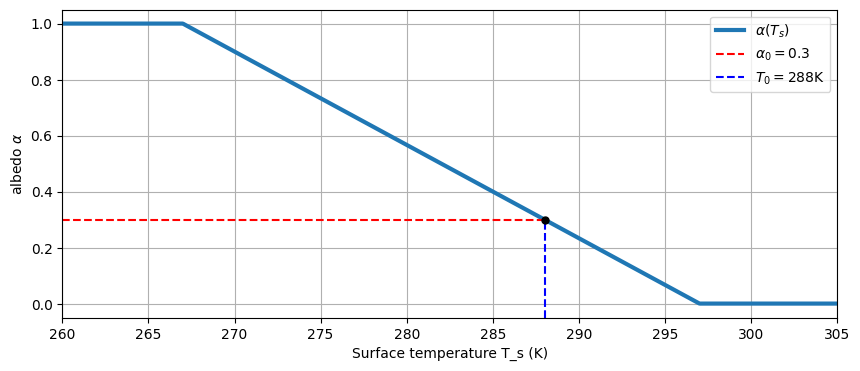

In [9]:
import numpy as np
import matplotlib.pyplot as plt

T_0 = 288 # Kelvin
T_range = 30 # Kelvin
alpha_0 = 0.3

def albedo(T_s, T_0=T_0, T_range=T_range, alpha_0=alpha_0):
    return np.clip(alpha_0 - (T_s - T_0)/T_range, 0, 1)

T_s = np.linspace(260, 305, 1000)
alpha = albedo(T_s=T_s)

fig, ax = plt.subplots(figsize=[10,4])
ax.plot(T_s, alpha, lw=3, label=r'$\alpha(T_s)$')
yl = ax.get_ylim()
ax.plot([T_s[0], T_0], [alpha_0]*2, 'r--', label=r'$\alpha_0 = 0.3$')
ax.plot([T_0]*2, [yl[0], alpha_0], 'b--', label=r'$T_0 = 288 \mathrm{K}$')
ax.plot(T_0, alpha_0, marker='.', color='k', markersize=10)
ax.set_xlabel('Surface temperature T_s (K)')
ax.set_ylabel(r'albedo $\alpha$')
ax.grid()
ax.set_xlim((T_s[0], T_s[-1]))
ax.set_ylim(yl)
ax.legend()
plt.savefig('albedo.jpg', dpi=600)

Now, the case of the albedo feedback the equation for the feedback parameter would become
\begin{align}
    \lambda_\alpha &= \frac{\partial R}{\partial \alpha}\Biggr\rvert_{\text{all but }\alpha}  \frac{\partial \alpha}{\partial T_s} \\
    &=\frac{\partial}{\partial \alpha}\Biggr\rvert_{\text{all but }\alpha} \left( \frac{S}{4} (1-\alpha) - \sigma T_s^4 \right)
    \frac{\partial}{\partial T_s} \left( \alpha_0 - \frac{T_s - T_0}{T_\text{range}} \right) \\
    &= \frac{S}{4 T_\text{range}}
\end{align}


In [10]:
S = 1360 # W / m^2
T_range = 30 # Kelvin
lambda_alpha = S/(4*T_range)
display(Markdown(r'**In this simple model, the ice-albedo feedback parameter is $\lambda_\alpha \approx %.2f \mathrm{W\,m}^{-2}\mathrm{\,K}^{-1}$.**' % lambda_alpha))

**In this simple model, the ice-albedo feedback parameter is $\lambda_\alpha \approx 11.33 \mathrm{W\,m}^{-2}\mathrm{\,K}^{-1}$.**

Note: in this example, the change in radiative forcing due to the feedback from a change in $1^\circ\mathrm{C}$ in surface is much larger than the initial forcing that would have caused this change in temperature in the first place. This means that for this simple example, any change in radiative forcing would cause a runaway feedback that would either turn the Earth into a snowball, or into a completely ice-free planet...

